In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

In [2]:
df = pd.read_hdf('features_30.h5')

In [3]:
df.head()

,time,waveform,lpc_coeff,amplitude
0,2019-05-27T18:16:37.000000Z,"[3.72132730069, -51.1812948272, -104.97754986,...","[1.0, -2.18162593255, 2.49176485988, -1.993432...","[0.390425590627, 0.366654576689, 0.33067666624..."
1,2019-05-27T17:31:45.000000Z,"[267.286223554, 213.095748702, 156.62064283, 9...","[1.0, -1.91957893956, 1.75126094982, -1.247919...","[0.304056059595, 0.328030528642, 0.44393763535..."
2,2019-05-27T17:17:41.000000Z,"[-150.572442193, -248.678406427, -332.00272918...","[1.0, -2.23007592873, 2.50516095499, -2.071459...","[0.661311999342, 0.584146916956, 0.42782305131..."
3,2019-05-27T19:23:49.000000Z,"[-220.99252159, -347.395354446, -449.371607879...","[1.0, -2.32914670106, 2.68123537773, -2.092240...","[0.382224472907, 0.586558602969, 0.38374742891..."
4,2019-05-27T20:41:11.000000Z,"[157.167620135, 286.219708967, 395.840778773, ...","[1.0, -2.38909167965, 2.78044991558, -2.351892...","[0.430395495412, 0.381969445864, 0.41658439725..."


In [4]:
def check_wf(wf):
    
    if len(wf) != 259:
        return 0
    else:
        return 1    

In [5]:
df['accept_signal'] = df['waveform'].apply(check_wf)

In [6]:
df = df[df['accept_signal']>0]

In [7]:
def scale(vec):
    
    vec-=np.mean(vec)
    vec/=np.std(vec)
    return vec
    

In [8]:
df.waveform = df['waveform'].apply(scale)
df.lpc_coeff = df['lpc_coeff'].apply(scale)
df.amplitude = df['amplitude'].apply(scale)

In [9]:
df.head()

,time,waveform,lpc_coeff,amplitude,accept_signal
0,2019-05-27T18:16:37.000000Z,"[0.0158810999017, -0.0367588506569, -0.0883380...","[0.532978581546, -1.2006501701, 1.34582286513,...","[-0.80383077214, -0.83517702322, -0.8826202083...",1
1,2019-05-27T17:31:45.000000Z,"[0.217929382801, 0.177055765433, 0.13445894607...","[0.546929495243, -1.05886855439, 0.96013064272...","[-1.17846643712, -1.13786962252, -0.9416000278...",1
2,2019-05-27T17:17:41.000000Z,"[-0.149794678508, -0.260617692893, -0.35474298...","[0.483930108041, -1.09174501829, 1.21816816629...","[-0.576909810157, -0.708350230084, -0.97462707...",1
3,2019-05-27T19:23:49.000000Z,"[-0.191800774518, -0.317321693705, -0.41858645...","[0.4570894207, -1.07637940861, 1.23149868469, ...","[-1.0065168605, -0.673603467102, -1.0040355694...",1
4,2019-05-27T20:41:11.000000Z,"[0.102960507618, 0.205200011241, 0.29204559324...","[0.495109947081, -1.20351900811, 1.38747995821...","[-0.714479105475, -0.775221954741, -0.73180295...",1


In [10]:
df.time = df.time.astype(str)

In [11]:
def exclude_days(date):
    
    eruption_days = ['2019-08-28', '2019-08-29', '2019-07-03']
    for d in eruption_days:
        if d in date:
            return 0
    return 1
    
    """
    test_days = ['2019-06-09', '2019-06-10', '2019-06-11', '2019-06-24', '2019-06-25', '2019-06-26']
    for d in test_days:
        if d in date:
            return 1
        else:
            0
    """

In [12]:
df['accept_days'] = df['time'].apply(exclude_days)

In [13]:
df = df[df['accept_days'] > 0]

In [14]:
df.time = pd.to_datetime(df['time'])

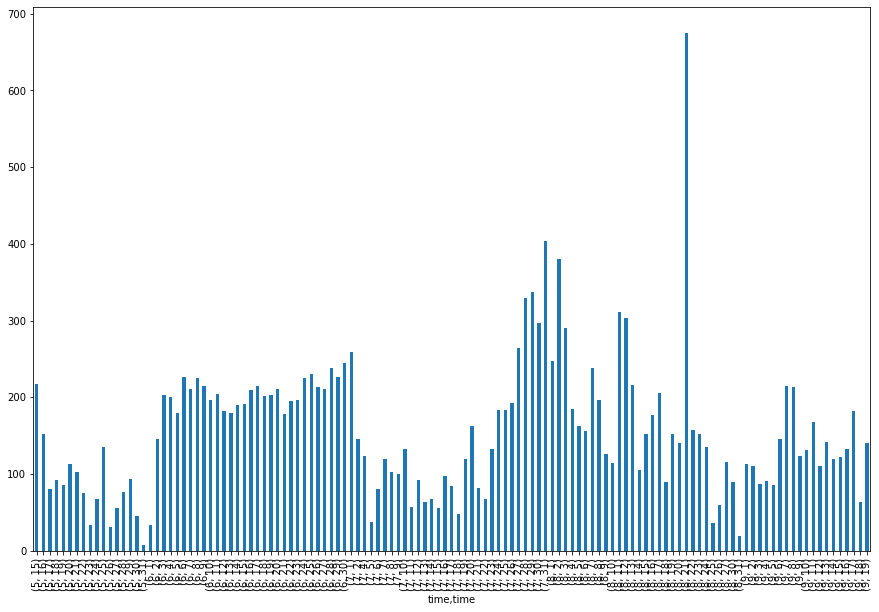

In [15]:
plt.figure(figsize=(15,10))
df['time'].groupby([df["time"].dt.month, df["time"].dt.day]).count().plot(kind="bar")

In [16]:
def final_input(wf, lpc, amp):
    
    #return list(np.concatenate((wf, lpc, amp), axis=None))
    return list(np.concatenate((wf), axis=None))
    #return list(np.concatenate((wf, amp), axis=None))

In [17]:
features = df.apply(lambda x: final_input(x['waveform'], x['lpc_coeff'], x['amplitude']), axis=1)#.to_numpy()#.values

In [18]:
d = pd.DataFrame(features.tolist())

In [19]:
t = d.to_numpy()

In [20]:
t.shape

(19748, 259)

In [59]:
size = 10
from minisom import MiniSom    
som = MiniSom(size, size, t.shape[1], sigma=.3, learning_rate=.5, random_seed = 3) # initialization of 6x6 SOM sigma .3, lr .5 init

In [60]:
som.random_weights_init(t)
som.train_random(t, 2000) # trains the SOM with 100 iterations

dict_keys([(9, 3), (2, 1), (4, 0), (1, 3), (0, 9), (5, 0), (5, 5), (5, 8), (9, 5), (7, 5), (9, 6), (8, 8), (4, 5), (0, 3), (7, 7), (0, 2), (3, 2), (9, 2), (1, 8), (7, 8), (9, 9), (0, 8), (9, 0), (2, 4), (3, 6), (5, 9), (0, 6), (6, 1), (1, 9), (2, 2), (2, 3), (2, 7), (1, 1), (8, 3), (8, 5), (4, 7), (5, 4), (9, 4), (3, 8), (5, 3), (3, 1), (6, 8), (8, 6), (9, 8), (6, 3), (9, 1), (8, 0), (6, 2), (3, 3), (4, 9), (4, 2), (2, 8), (8, 1), (1, 0), (3, 0), (9, 7), (7, 0), (5, 1), (1, 5), (4, 1), (2, 9), (5, 2), (3, 4), (7, 9), (6, 0), (7, 4), (8, 2), (1, 7), (4, 6), (6, 9), (1, 4), (7, 6), (4, 4), (0, 0), (3, 9), (0, 1), (5, 6), (7, 3), (6, 6), (6, 5), (7, 2), (2, 6), (3, 7), (6, 7), (1, 2), (4, 8), (0, 7), (4, 3), (8, 4), (0, 5), (3, 5), (8, 9), (0, 4), (1, 6), (2, 5), (5, 7), (2, 0), (8, 7), (7, 1), (6, 4)])


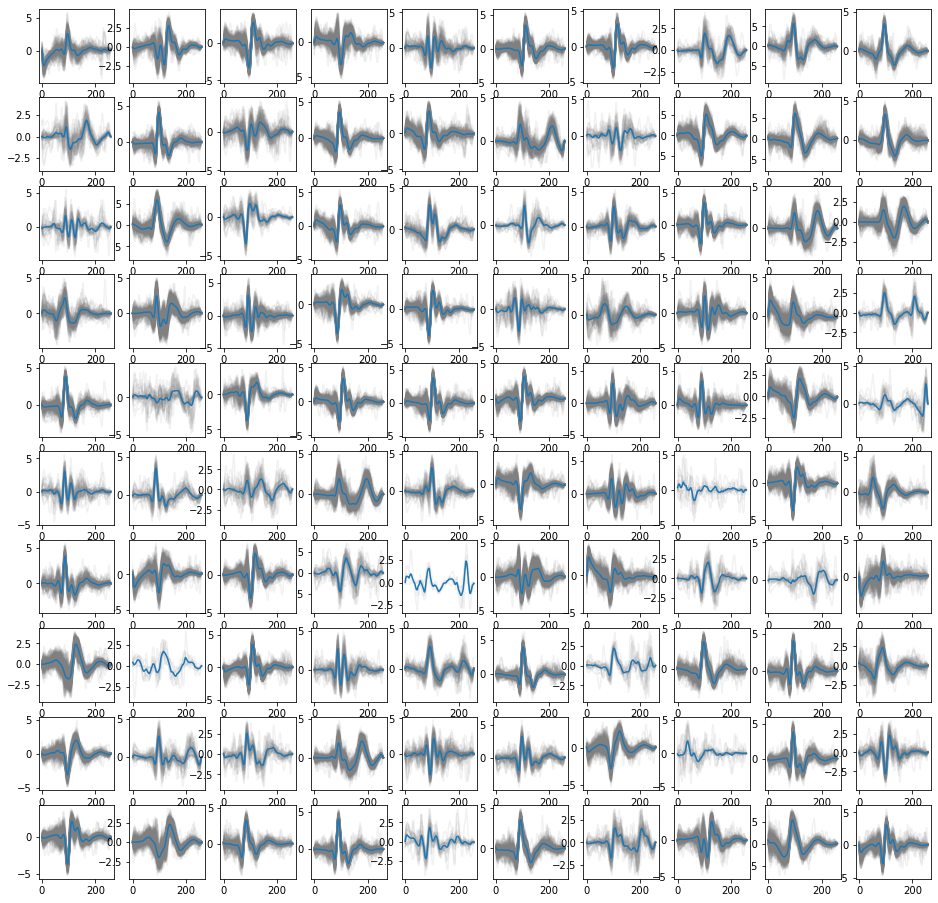

In [61]:
win_map = som.win_map(t)

print( win_map.keys() )

plt.figure(figsize=(16, 16))
the_grid = GridSpec(size, size)
for position in win_map.keys():
    
    #print( 6 - position[1] )
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
    plt.subplot(the_grid[position[0], position[1]])
    #plt.plot(np.min(win_map[position], axis=0), color='gray', alpha=.5)
    for vec in win_map[position]:
        plt.plot(vec, color='gray', alpha=.1)
    plt.plot(np.mean(win_map[position], axis=0))
    #plt.text(300, 5000, str(len(win_map[position])), fontdict=font)
    #plt.plot(np.max(win_map[position], axis=0), color='gray', alpha=.5)
    
plt.show()

In [62]:
from matplotlib import cm

In [63]:
cmap = cm.get_cmap('bone_r') #gray_r')

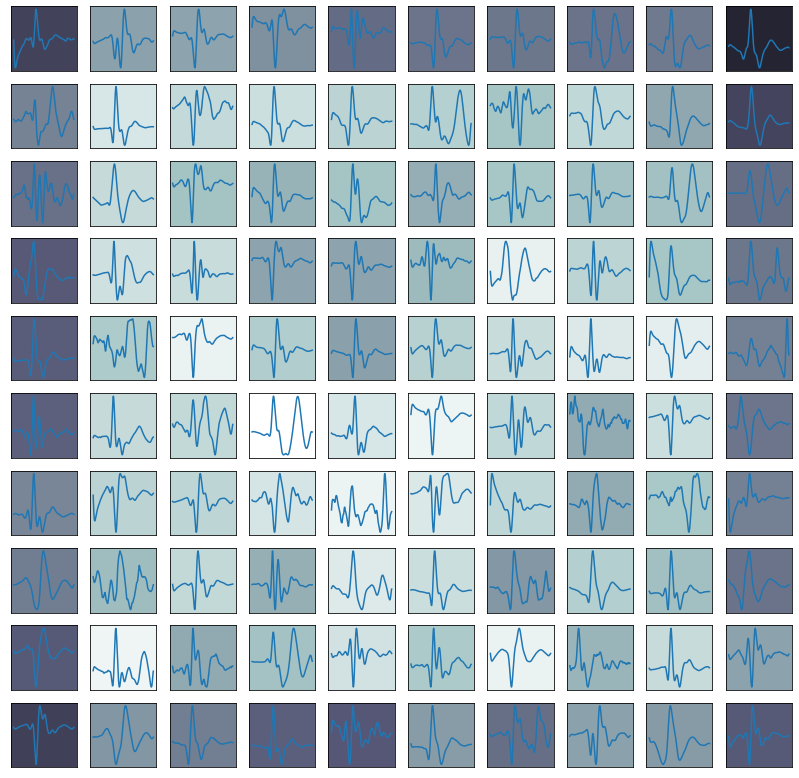

In [64]:
plt.figure(figsize=(14, 14))
#plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=1)
the_grid = GridSpec(size, size)

dmap = som.distance_map() 
#for position in win_map.keys():
for i in range(size):
    for j in range(size):
        
        ax = plt.subplot(the_grid[i, j])
        c = cmap(1-dmap[i, j])
        ax.set_facecolor((c[0], c[1], c[2]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if (i, j) in win_map.keys():
            plt.plot(np.mean(win_map[i, j], axis=0))
        """
        ax = plt.subplot(the_grid[position[0], position[1]])
        #ax.set_facecolor('xkcd:salmon')
        c = cmap(dmap[position[0], position[1]])
        ax.set_facecolor((c[0], c[1], c[2]))
        plt.plot(np.mean(win_map[position], axis=0))
        """
#plt.pcolor(som.distance_map(), cmap='gray_r', alpha=.2)
plt.show()

In [158]:
dmap

array([[ 0.03628629,  0.05830361,  0.06071428,  0.05971782,  0.05935074,
         0.06038247,  0.0603243 ,  0.05829556,  0.05909838,  0.05984225,
         0.05957606,  0.0606488 ,  0.06050971,  0.06069362,  0.05999153,
         0.06090705,  0.06005402,  0.06028842,  0.06082486,  0.03560346],
       [ 0.05936618,  0.09647227,  0.09539816,  0.09690795,  0.09323621,
         0.09704044,  0.09535227,  0.09472352,  0.09515639,  0.09784788,
         0.09484275,  0.09616049,  0.09779897,  0.09655278,  0.09706343,
         0.09586468,  0.09606356,  0.09568451,  0.09471245,  0.06000874],
       [ 0.06046073,  0.09714463,  0.09912347,  0.09459552,  0.09497575,
         0.09409523,  0.09686204,  0.09625582,  0.09600793,  0.09803725,
         0.09623524,  0.096509  ,  0.09529969,  0.09704368,  0.09631349,
         0.09547106,  0.0951879 ,  0.09630809,  0.09510082,  0.06150536],
       [ 0.15707374,  0.1990039 ,  0.10031092,  0.09584705,  0.09532219,
         0.09581551,  0.09729876,  0.09615322,  